In [65]:
import numpy as np 
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt
 
import warnings
warnings.filterwarnings("ignore") 
# sns.set_style("darkgrid", {"grid.color": ".6", 
#                            "grid.linestyle": ":"})
 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# from xgboost import XGBClassifier
# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_squared_error 
# from sklearn.model_selection import GridSearchCV

In [66]:
df = pd.read_csv('/Users/thutranghoa/Code/Data_analysis/Data/heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


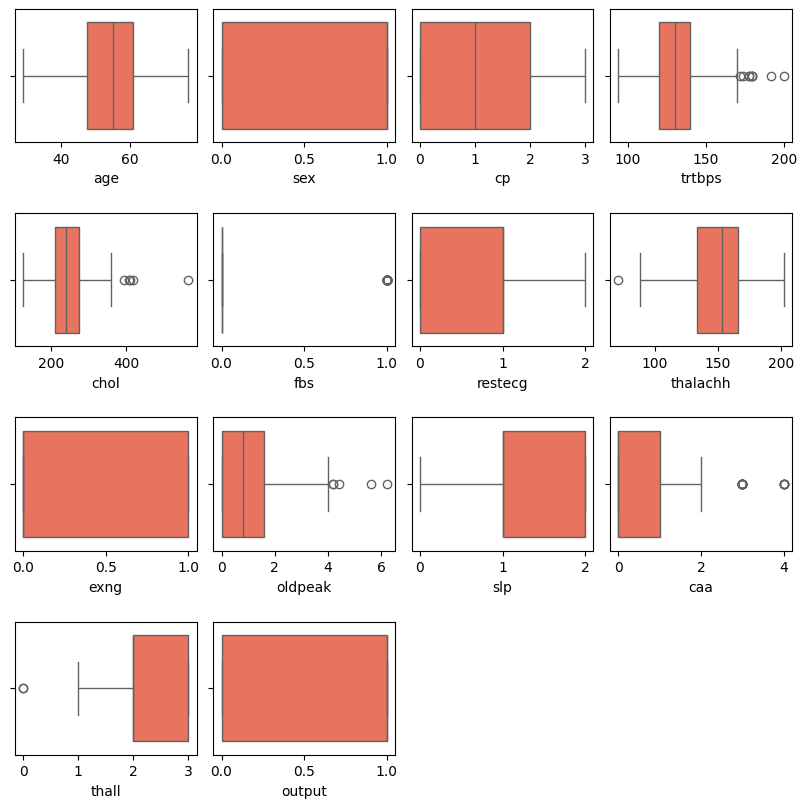

In [4]:
'1 - Boxplot '
fig = plt.figure(figsize=(8, 8))
temp = df.columns.tolist()
for i, item in enumerate(temp):
    plt.subplot(4, 4, i+1)
    sns.boxplot(data=df, x=item, color='tomato')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()


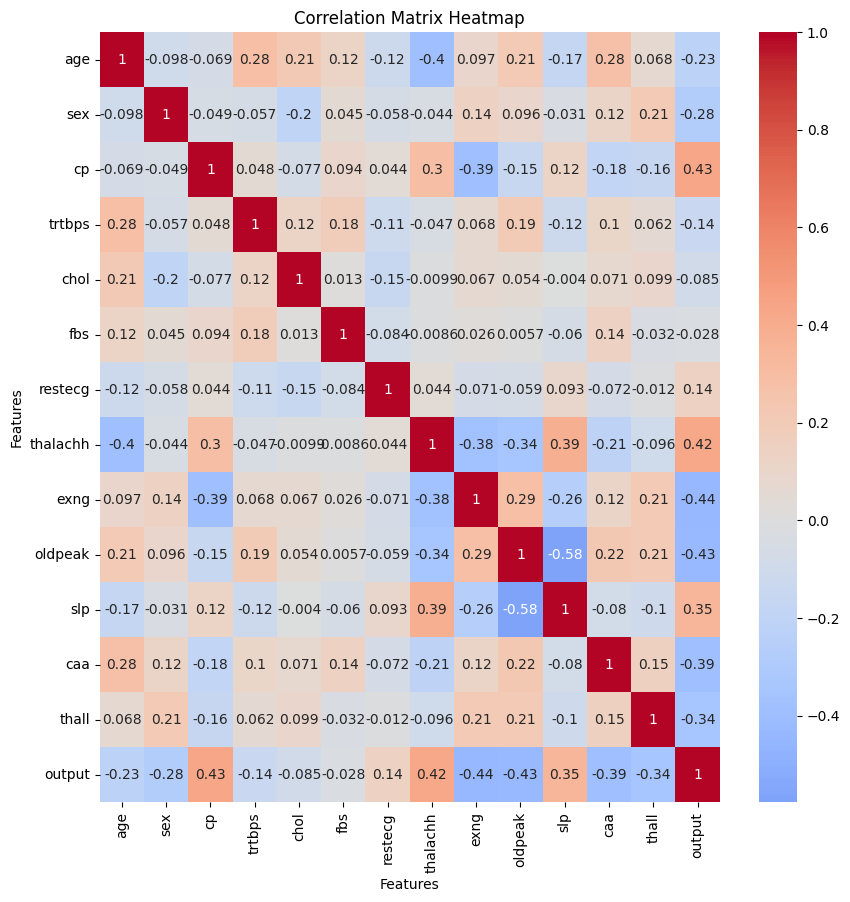

In [8]:
'2 - Heatmap'
plt.figure(figsize=(10, 10))
correlation  = df.corr()
 
# Create heatmap
sns.heatmap(correlation, cmap='coolwarm',
            center=0, annot=True)
 
# Set title and axis labels
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
# plt.yticks(rotation = 30)
 
# Show plot
plt.show()

<Axes: title={'center': 'Histogram of Age'}>

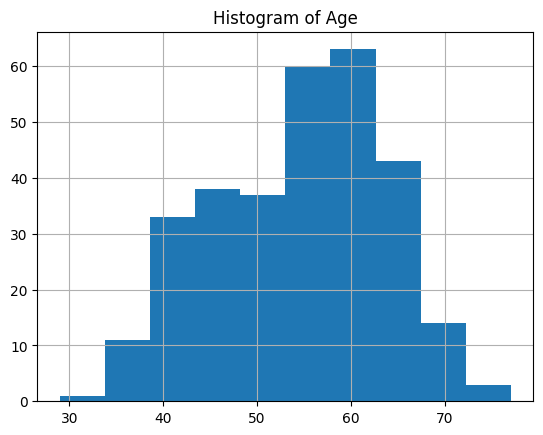

In [17]:
'3- Histogram to dertermine distribution of age'
# plt.figure(figsize=(30, 30))
plt.title('Histogram of Age')

df['age'].hist()

In [20]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [78]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [79]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0,0,0.478391,-0.101730,0,1,-1.165281,1,-0.724323,1,0,3,0
299,-1.033002,1,3,-1.234996,0.342756,0,1,-0.771706,0,0.138373,1,0,3,0
300,1.503641,1,0,0.706843,-1.029353,1,1,-0.378132,0,2.036303,1,2,3,0
301,0.290464,1,0,-0.092738,-2.227533,0,1,-1.515125,1,0.138373,1,1,3,0


In [68]:
y = df['output']
X = df.drop(['output'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.32, random_state = 0)

In [69]:
rf=RandomForestClassifier()
dt=DecisionTreeClassifier()
lr=LogisticRegression()

In [75]:
'RF '
print ('Random Forest model : ')
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
print ('Train : ', accuracy_score(y_train,rf.predict(X_train)))
print ('Test : ', accuracy_score(y_test,y_pred_rf))

Random Forest model : 
Train :  1.0
Test :  0.8350515463917526


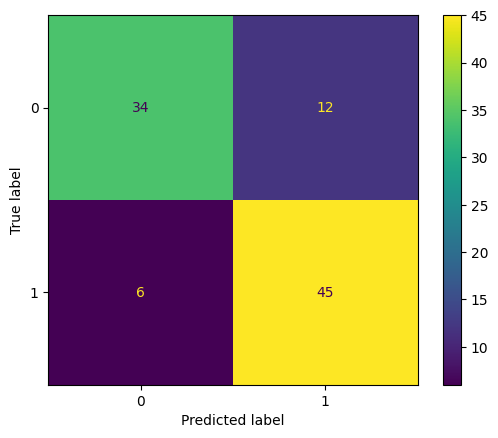

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix, classification_report

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)

plt.show()

In [72]:
'Logistic '
print ('Logistic regression model : ')
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
print ('Train : ', accuracy_score(y_train,lr.predict(X_train)))
print ('Test : ', accuracy_score(y_test,y_pred_lr))

Logistic regression model : 
Train :  0.8689320388349514
Test :  0.8041237113402062


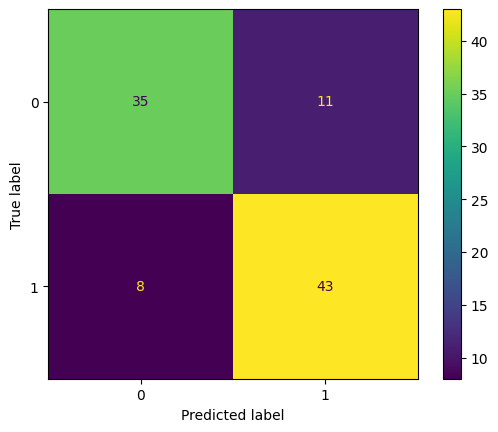

In [73]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)

plt.show()

In [74]:
'DT '
print ('Decision Tree model : ')
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
print ('Train : ', accuracy_score(y_train,dt.predict(X_train)))
print ('Test : ', accuracy_score(y_test,y_pred_dt))

Decision Tree model : 
Train :  1.0
Test :  0.6907216494845361


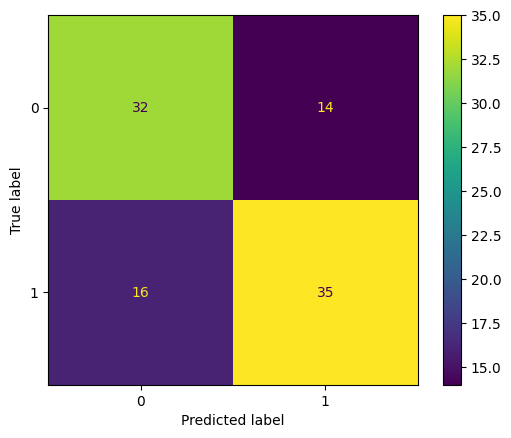

In [55]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt)

plt.show()

In [48]:

para={'n_estimators':[20,60,100,120],
      'max_features' : [0.2,0.6,1.0],
      'max_depth':[2,8,None],
      'max_samples':[0.5,0.75,1.0]
     }

# param_grid = { 
#     'n_estimators': [200, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy']
# }

rf = RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=rf, param_grid=para, cv= 5)
CV_rfc.fit(X_train, y_train)

# rf_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]})

In [62]:
CV_rfc.fit(X_train,y_train)
print (CV_rfc.best_params_)
print ('Best score : ',CV_rfc.best_score_)

{'max_depth': None, 'max_features': 0.2, 'max_samples': 1.0, 'n_estimators': 100}
Best score :  0.8544715447154472


In [43]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [45]:

print (grid_search.best_params_)
print (grid_search.best_score_)

{'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt'}
0.8155632984901278


In [46]:

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print(logreg_cv.best_params_)
print(logreg_cv.best_score_)

{'C': 0.1, 'penalty': 'l2'}
0.8545238095238096


Text(0.5, 1.0, 'Accurancy of each model')

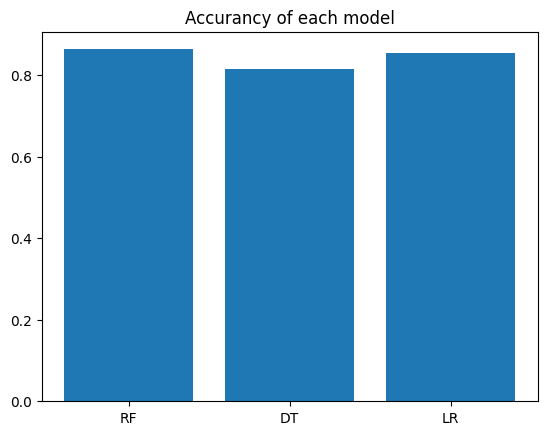

In [61]:
plt.bar (['RF', 'DT', 'LR'], [CV_rfc.best_score_, grid_search.best_score_, logreg_cv.best_score_])
plt.title('Accurancy of each model')